In [1]:
import numpy as np
import os
import pandas as pd 
import matplotlib.pyplot as plt

os.chdir('/Users/matthiasboeker/Desktop/Master_Thesis/Schizophrenia_Depression_Project')
from Modules.func.support_functions import *

In [2]:
shizophrenia_p, shizophrenia_c = load_data()
#Reshape 
shizophrenia_p = [np.array(X).reshape(len(X), 1) for X in shizophrenia_p]
shizophrenia_c = [np.array(X).reshape(len(X), 1) for X in shizophrenia_c]

## Feature Extraction 

### Extract average activity and variablitiy 

In [3]:
means_p = np.array([np.mean(shizophrenia_p[i]) for i in range(0,len(shizophrenia_p))])
means_c = np.array([np.mean(shizophrenia_c[i]) for i in range(0,len(shizophrenia_c))])
var_p = np.array([np.var(shizophrenia_p[i]) for i in range(0,len(shizophrenia_p))])
var_c = np.array([np.var(shizophrenia_c[i]) for i in range(0,len(shizophrenia_c))])

### Extract 24h daily structure 

In [4]:
days_c = [np.array([shizophrenia_c[l][i*(60*24):(i+1)*(60*24)] for i in range(0,int(len(shizophrenia_c[l])/(60*24))-1)]) for l in range(0,len(shizophrenia_c))]
days_p = [np.array([shizophrenia_p[l][i*(60*24):(i+1)*(60*24)] for i in range(0,int(len(shizophrenia_p[l])/(60*24))-1)]) for l in range(0,len(shizophrenia_p))]
# Day mean and standard deviation
day_mean_p = [np.mean(days_p[i], axis=0) for i in range(0,len(days_p))]
day_mean_c = [np.mean(days_c[i], axis=0) for i in range(0,len(days_c))]
prop_z_p = [np.mean([(days_p[i][j]==0).sum()/len(days_p[i][j]) for j in range(0,len(days_p[i]))]) for i in range(0,len(days_p))]
prop_z_c = [np.mean([(days_c[i][j]==0).sum()/len(days_c[i][j]) for j in range(0,len(days_c[i]))]) for i in range(0,len(days_c))]

### Extract 12h structure 9-21 day

In [5]:
daily_c = [np.array([shizophrenia_c[l][i*(60*12):(i+1)*(60*12)] for i in range(0,int(len(shizophrenia_c[l])/(60*12))-1,2)]) for l in range(0,len(shizophrenia_c))]
daily_p = [np.array([shizophrenia_p[l][i*(60*12):(i+1)*(60*12)] for i in range(0,int(len(shizophrenia_p[l])/(60*12))-1, 2)]) for l in range(0,len(shizophrenia_p))]
# Daily mean and standard deviation
daily_mean_p = [np.mean(daily_p[i], axis=0) for i in range(0,len(daily_p))]
daily_mean_c = [np.mean(daily_c[i], axis=0) for i in range(0,len(daily_c))]
daily_std_p = [np.std(daily_p[i], axis=0) for i in range(0,len(daily_p))]
daily_std_c = [np.std(daily_c[i], axis=0) for i in range(0,len(daily_c))]

### Extract 12h structure 21-9 night


In [6]:
night_c = [np.array([shizophrenia_c[l][i*(60*12):(i+1)*(60*12)] for i in range(1,int(len(shizophrenia_c[l])/(60*12))-1,2)]) for l in range(0,len(shizophrenia_c))]
night_p = [np.array([shizophrenia_p[l][i*(60*12):(i+1)*(60*12)] for i in range(1,int(len(shizophrenia_p[l])/(60*12))-1, 2)]) for l in range(0,len(shizophrenia_p))]
# Nightly mean and standard deviation
night_mean_p = [np.mean(night_p[i], axis=0) for i in range(0,len(night_p))]
night_mean_c = [np.mean(night_c[i], axis=0) for i in range(0,len(night_c))]
night_std_p = [np.std(night_p[i], axis=0) for i in range(0,len(night_p))]
night_std_c = [np.std(night_c[i], axis=0) for i in range(0,len(night_c))]

### Intradaily Variability 

In [7]:
#Squared Differenciate
shizophrenia_c_nom = [(np.diff(shizophrenia_c[l],axis=0)[1:]**2).sum()*len(shizophrenia_c[l]) for l in range(0,len(shizophrenia_c))]
shizophrenia_p_nom = [(np.diff(shizophrenia_p[l],axis=0)[1:]**2).sum()*len(shizophrenia_p[l]) for l in range(0,len(shizophrenia_p))]

In [8]:
IV_c = [shizophrenia_c_nom[l]/((len(shizophrenia_c[l])-1)*var_c[l]) for l in range(0,len(shizophrenia_c))]
IV_p = [shizophrenia_p_nom[l]/((len(shizophrenia_p[l])-1)*var_p[l]) for l in range(0,len(shizophrenia_p))]

### Interday Stability

In [9]:
# Get the hourly means
hourly_mean_p = [np.array([np.mean(day_mean_p[l][i*(60):(i+1)*(60)]) for i in range(0,int(len(day_mean_p[l])/60))]) for l in range(0,len(day_mean_p))]
hourly_mean_c = [np.array([np.mean(day_mean_c[l][i*(60):(i+1)*(60)]) for i in range(0,int(len(day_mean_c[l])/60))]) for l in range(0,len(day_mean_c))]



In [10]:
IS_p = [len(shizophrenia_p[i])*((hourly_mean_p[i]-means_p[i])**2).sum()/(day_mean_p[i].shape[0]*var_p[i]) for i in range(0,len(shizophrenia_p))]   
IS_c = [len(shizophrenia_c[i])*((hourly_mean_c[i]-means_c[i])**2).sum()/(day_mean_c[i].shape[0]*var_c[i]) for i in range(0,len(shizophrenia_c))]

### Autocorrelation 

In [11]:
def autocorr(x):
    result = np.correlate(x, x)
    return result[result.size // 2:]

In [12]:
ar_p = np.squeeze(np.array([autocorr(shizophrenia_p[i][:,0]) for i in range(0,len(shizophrenia_p))]).reshape(1,-1))
ar_c = np.squeeze(np.array([autocorr(shizophrenia_c[i][:,0]) for i in range(0,len(shizophrenia_c))]).reshape(1,-1))


In [13]:
from statsmodels.tsa.stattools import acf, pacf
lags = acf(shizophrenia_p[10], nlags=1500)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/statsmodels/tsa/stattools.py:593: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  FutureWarning


### Root Mean Square of successive differences

In [14]:
rmssd_p = np.array([np.sqrt((np.diff(shizophrenia_p[i],axis=0)**2).sum()/(len(shizophrenia_p[i])-1)) for i in range(0,len(shizophrenia_p))])
rmssd_c = np.array([np.sqrt((np.diff(shizophrenia_c[i],axis=0)**2).sum()/(len(shizophrenia_c[i])-1)) for i in range(0,len(shizophrenia_c))])

### Creating Feature Matrix

In [15]:
feat_p  = {'Mean': means_p, 'Variance': var_p,'f.prop':prop_z_p ,'IV':  IV_p,'IS':  IS_p, 'AR':  ar_p,'RMSSD': rmssd_p ,'label': np.repeat(1, len(var_p))}
feat_df_p = pd.DataFrame(data=feat_p)

feat_c  = {'Mean': means_c, 'Variance': var_c,'f.prop':prop_z_c ,'IV':  IV_c, 'IS':  IS_c, 'AR':  ar_c,'RMSSD': rmssd_c , 'label': np.repeat(0, len(var_c))}
feat_df_c = pd.DataFrame(data=feat_c)

feat = pd.concat([feat_df_p, feat_df_c], axis=0, sort=False)
feat = feat.reset_index()


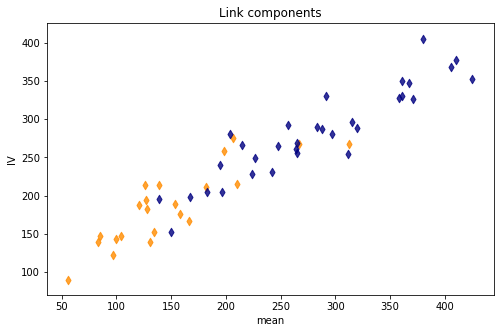

In [16]:
fig = plt.figure(figsize=(8,5))
color = ['darkorange' if x>0 else 'navy' for x in feat['label']]
shape = ['d' if k>0 else 'd' for k in feat['label']]
for x, l, c, m in zip( feat['Mean'],  feat['RMSSD'], color, shape):
    plt.scatter(x, l, alpha=0.8, c=c,marker=m)  
    plt.xlabel('mean')
    plt.ylabel('IV')
    plt.title('Link components')

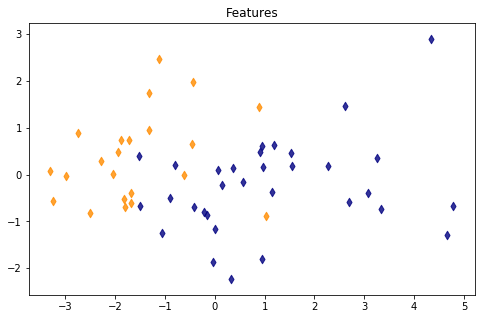

In [17]:
from sklearn.decomposition import PCA, KernelPCA
from sklearn.preprocessing import StandardScaler
X = feat.drop(['label','index', 'f.prop'], axis=1)
y = feat['label']

scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns= X.columns.values)
# pca of features spaces 
pca = KernelPCA(n_components=2, kernel='linear')
principalComponents_all = pca.fit_transform(X)


fig = plt.figure(figsize=(8,5))
color = ['darkorange' if x>0 else 'navy' for x in y]
shape = ['d' if k>0 else 'd' for k in y]
for x, l, c, m in zip(principalComponents_all[:,0], principalComponents_all[:,1], color, shape):
    plt.scatter(x, l, alpha=0.8, c=c,marker=m)  
    plt.title('Features')


### Correlation Matrix

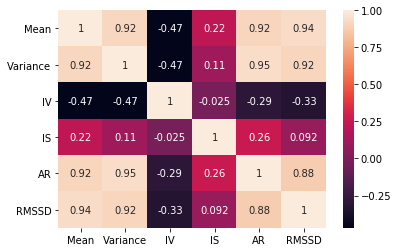

In [18]:
import seaborn as sns
X = feat.drop(['label','index', 'f.prop'], axis=1)
y = feat['label']
corr = X.corr()
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns, annot=True, cmap="rocket")

## Logistic Regression with L1 Reg

In [20]:
# Logisitc Regression
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import precision_recall_curve, average_precision_score, log_loss
from sklearn.metrics import roc_curve, auc, roc_auc_score, confusion_matrix, matthews_corrcoef
X = feat.drop(['label','index','f.prop'], axis=1)
y = feat['label']
#Standardize the data 
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns= X.columns.values)
X_train,  X_test, y_train, y_test = train_test_split(X,y,test_size=0.1,random_state=0,  shuffle=True)
class_weight = 'balanced'
penalty = 'l1'
C= [50,10, 5, 1, 0.8, 0.5, 0.3, 0.1, 0.08, 0.05, 0.03, 0.01]
n_jobs =1
solver='liblinear'
coefs = []
areaUnderROC = []
average_precision = []
for c in C: 
    logReg = LogisticRegression(C=c,random_state=133,penalty = penalty, solver=solver, n_jobs=n_jobs,fit_intercept=True )

    trainingScores = []
    cvScores = []
    
    predictionsBasedOnKFolds = pd.DataFrame(data=[],index=y_train.index,columns=[0,1])

    for train_index, test_index in k_fold.split(X_train,y_train):
        X_train_fold, X_cv_fold = X_train.iloc[train_index,:], X_train.iloc[test_index,:]
        y_train_fold, y_cv_fold = y_train.iloc[train_index],y_train.iloc[test_index]

        logReg.fit(X_train_fold, y_train_fold)
        loglossTraining = log_loss(y_train_fold,logReg.predict_proba(X_train_fold)[:,1])
    

        trainingScores.append(loglossTraining)

        predictionsBasedOnKFolds.loc[X_cv_fold.index,:] = logReg.predict_proba(X_cv_fold)
        loglossCV = log_loss(y_cv_fold, predictionsBasedOnKFolds.loc[X_cv_fold.index,1])
        cvScores.append(loglossCV)
        preds = pd.concat([y_train,predictionsBasedOnKFolds.loc[:,1]], axis=1)
        preds.columns = ['trueLabel','prediction']
        predictionsBasedOnKFoldsLogisticRegression = preds.copy()
    fpr, tpr, thresholds = roc_curve(preds['trueLabel'],preds['prediction'])
    average_precision.append(average_precision_score(preds['trueLabel'],
                                            preds['prediction']))
    areaUnderROC.append(auc(fpr, tpr))
    
    coefs.append(logReg.coef_)
    
coefs = pd.DataFrame(np.squeeze(np.asarray(coefs)), columns = X.columns)  
coefs['C'] = C

res = np.concatenate((np.array(areaUnderROC,ndmin=2),np.array(average_precision,ndmin=2)),axis=0)
res = res.reshape(12,2)
pred_res = pd.DataFrame(res, columns = ['AUC', 'Avg_Precision']) 

NameError: name 'k_fold' is not defined

### Performance Plot for different C parameters

In [ ]:
pred_res

In [ ]:
fig = plt.figure()
plt.plot(pred_res['AUC'], ls='-.', color='blue')
plt.plot(pred_res['Avg_Precision'], ls='--',color='darkgreen' )
plt.xticks(range(0,len(C)),C)
plt.xlim(1.0)
plt.legend(title='', loc='upper left', bbox_to_anchor=(1.05, 1))
plt.xlabel('C parameter')
plt.ylabel('Predicition Score')
print('Max AUC at C: ',C[np.argmax(pred_res['AUC'])])
print('Max Average Precision at C: ',C[np.argmax(pred_res['Avg_Precision'])])

### L1 Regularization Plot Coefficients 

In [ ]:
coefs_plot = coefs.drop(['C'], axis=1)
coefs_plot.plot()                 
plt.xticks(range(0,len(C)),C)
plt.legend(title='', loc='upper left', bbox_to_anchor=(1.05, 1))
plt.xlabel('C parameter')
plt.ylabel('Coefficient value')

In [ ]:
zoom = coefs.iloc[5:,:].reset_index(drop=True)
zoom.plot()
plt.xticks(range(0,len(C[5:])),C[5:])
plt.legend(title='', loc='upper left', bbox_to_anchor=(1.05, 1))
plt.xlabel('C parameter')
plt.ylabel('Coefficient value')

In [ ]:
X = feat.drop(['label','index','f.prop', 'Variance', 'AR'], axis=1)
y = feat['label']

#Standardize the data 
scaler = StandardScaler()
for f in X.columns:
    #X = pd.DataFrame(scaler.fit_transform(X), columns= X.columns.values)
    dat = tools.add_constant(X[f])
    log_reg = sm.Logit(y, dat).fit()
    print(log_reg.summary())
  

### Single SKlearn Log Regression RMSSD

Index(['RMSSD'], dtype='object')
Matthews Corr Coef:  0.7428571428571429


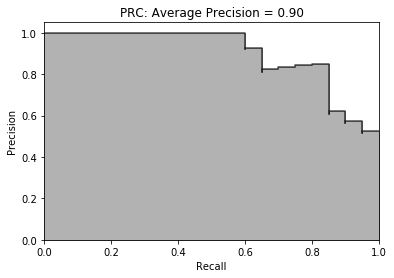

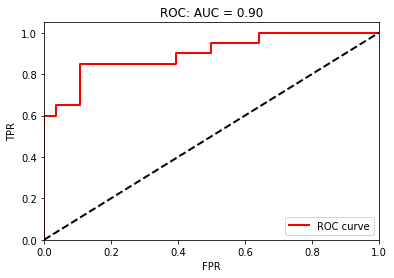

In [31]:
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import precision_recall_curve, average_precision_score, log_loss
from sklearn.metrics import roc_curve, auc, roc_auc_score, confusion_matrix
X = feat.drop(['label','index','f.prop', 'Variance', 'AR','Mean','IV','IS' ], axis=1)
y = feat['label']
print(X.columns)
X_train,  X_test, y_train, y_test = train_test_split(X,y,test_size=0.1,random_state=0,  shuffle=True)
k_fold = StratifiedKFold(n_splits=10, shuffle=True, random_state=123)


# Logisitc Regression
class_weight = 'balanced'
penalty = 'l1'
C=1
n_jobs =1
solver='liblinear'
logReg = LogisticRegression(C=C,random_state=133,penalty = penalty, solver=solver, n_jobs=n_jobs, fit_intercept=True )

trainingScores = []
cvScores = []
predictionsBasedOnKFolds = pd.DataFrame(data=[],index=y_train.index,columns=[0,1])

for train_index, test_index in k_fold.split(X_train,y_train):
    X_train_fold, X_cv_fold = X_train.iloc[train_index,:], X_train.iloc[test_index,:]
    y_train_fold, y_cv_fold = y_train.iloc[train_index],y_train.iloc[test_index]

    logReg.fit(X_train_fold, y_train_fold)
    loglossTraining = log_loss(y_train_fold,logReg.predict_proba(X_train_fold)[:,1])
    

    trainingScores.append(loglossTraining)

    predictionsBasedOnKFolds.loc[X_cv_fold.index,:] = logReg.predict_proba(X_cv_fold)
    loglossCV = log_loss(y_cv_fold, predictionsBasedOnKFolds.loc[X_cv_fold.index,1])
    cvScores.append(loglossCV)


preds = pd.concat([y_train,predictionsBasedOnKFolds.loc[:,1]], axis=1)
preds.columns = ['trueLabel','prediction']
predictionsBasedOnKFoldsLogisticRegression = preds.copy()


precision, recall, thresholds = precision_recall_curve(preds['trueLabel'],preds['prediction'])


average_precision = average_precision_score(preds['trueLabel'],
                                            preds['prediction'])

plt.step(recall, precision, color='k', alpha=0.7, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.3, color='k')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])

plt.title('PRC: Average Precision = {0:0.2f}'.format(
          average_precision))

fpr, tpr, thresholds = roc_curve(preds['trueLabel'],preds['prediction'])
print('Matthews Corr Coef: ',matthews_corrcoef(preds['trueLabel'],preds['prediction'].astype(np.double).round()))
areaUnderROC = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='r', lw=2, label='ROC curve')
plt.plot([0, 1], [0, 1], color='k', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC: AUC = {0:0.2f}'.format(areaUnderROC))
plt.legend(loc="lower right")
plt.show()

### Single SKlearn Log Regression IV

Index(['IV'], dtype='object')
Matthews Corr Coef:  0.5242186517143345


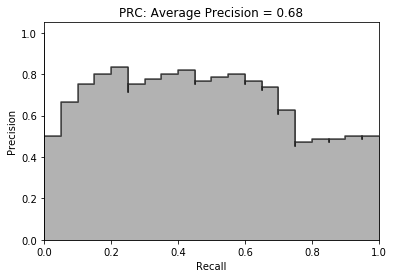

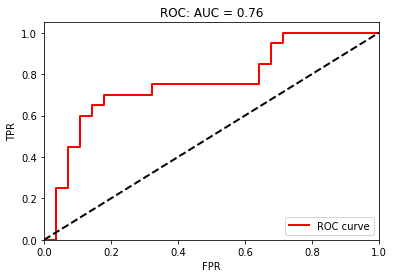

In [30]:
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import precision_recall_curve, average_precision_score, log_loss
from sklearn.metrics import roc_curve, auc, roc_auc_score, confusion_matrix
X = feat.drop(['label','index','f.prop', 'Variance', 'AR','Mean','RMSSD','IS' ], axis=1)
y = feat['label']
X_train,  X_test, y_train, y_test = train_test_split(X,y,test_size=0.1,random_state=0,  shuffle=True)
k_fold = StratifiedKFold(n_splits=10, shuffle=True, random_state=123)
print(X.columns)

# Logisitc Regression
class_weight = 'balanced'
penalty = 'l1'
C=1
n_jobs =1
solver='liblinear'
logReg = LogisticRegression(C=C,random_state=133,penalty = penalty, solver=solver, n_jobs=n_jobs, fit_intercept=True )

trainingScores = []
cvScores = []
predictionsBasedOnKFolds = pd.DataFrame(data=[],index=y_train.index,columns=[0,1])

for train_index, test_index in k_fold.split(X_train,y_train):
    X_train_fold, X_cv_fold = X_train.iloc[train_index,:], X_train.iloc[test_index,:]
    y_train_fold, y_cv_fold = y_train.iloc[train_index],y_train.iloc[test_index]

    logReg.fit(X_train_fold, y_train_fold)
    loglossTraining = log_loss(y_train_fold,logReg.predict_proba(X_train_fold)[:,1])
    

    trainingScores.append(loglossTraining)

    predictionsBasedOnKFolds.loc[X_cv_fold.index,:] = logReg.predict_proba(X_cv_fold)
    loglossCV = log_loss(y_cv_fold, predictionsBasedOnKFolds.loc[X_cv_fold.index,1])
    cvScores.append(loglossCV)


preds = pd.concat([y_train,predictionsBasedOnKFolds.loc[:,1]], axis=1)
preds.columns = ['trueLabel','prediction']
predictionsBasedOnKFoldsLogisticRegression = preds.copy()


precision, recall, thresholds = precision_recall_curve(preds['trueLabel'],preds['prediction'])


average_precision = average_precision_score(preds['trueLabel'],
                                            preds['prediction'])

plt.step(recall, precision, color='k', alpha=0.7, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.3, color='k')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])

plt.title('PRC: Average Precision = {0:0.2f}'.format(
          average_precision))

fpr, tpr, thresholds = roc_curve(preds['trueLabel'],preds['prediction'])
print('Matthews Corr Coef: ',matthews_corrcoef(preds['trueLabel'],preds['prediction'].astype(np.double).round()))
areaUnderROC = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='r', lw=2, label='ROC curve')
plt.plot([0, 1], [0, 1], color='k', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC: AUC = {0:0.2f}'.format(areaUnderROC))
plt.legend(loc="lower right")
plt.show()

### Single SKlearn Log Regression Mean

Index(['Mean'], dtype='object')
Confusion matrix: 
[[26  2]
 [ 4 16]]
Matthews Corr Coef:  0.741940826802374


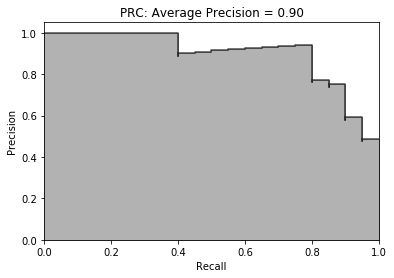

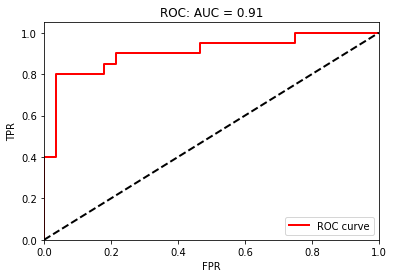

In [28]:
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import precision_recall_curve, average_precision_score, log_loss
from sklearn.metrics import roc_curve, auc, roc_auc_score, confusion_matrix, matthews_corrcoef
X = feat.drop(['label','index','f.prop', 'Variance', 'IV','RMSSD','AR','IS' ], axis=1)
y = feat['label']
X_train,  X_test, y_train, y_test = train_test_split(X,y,test_size=0.1,random_state=0,  shuffle=True)
k_fold = StratifiedKFold(n_splits=10, shuffle=True, random_state=123)
print(X.columns)

# Logisitc Regression
class_weight = 'balanced'
penalty = 'l1'
C=1
n_jobs =1
solver='liblinear'
logReg = LogisticRegression(C=C,random_state=133,penalty = penalty, solver=solver, n_jobs=n_jobs, fit_intercept=True )

trainingScores = []
cvScores = []
predictionsBasedOnKFolds = pd.DataFrame(data=[],index=y_train.index,columns=[0,1])

for train_index, test_index in k_fold.split(X_train,y_train):
    X_train_fold, X_cv_fold = X_train.iloc[train_index,:], X_train.iloc[test_index,:]
    y_train_fold, y_cv_fold = y_train.iloc[train_index],y_train.iloc[test_index]

    logReg.fit(X_train_fold, y_train_fold)
    loglossTraining = log_loss(y_train_fold,logReg.predict_proba(X_train_fold)[:,1])
    

    trainingScores.append(loglossTraining)

    predictionsBasedOnKFolds.loc[X_cv_fold.index,:] = logReg.predict_proba(X_cv_fold)
    loglossCV = log_loss(y_cv_fold, predictionsBasedOnKFolds.loc[X_cv_fold.index,1])
    cvScores.append(loglossCV)


preds = pd.concat([y_train,predictionsBasedOnKFolds.loc[:,1]], axis=1)
preds.columns = ['trueLabel','prediction']
predictionsBasedOnKFoldsLogisticRegression = preds.copy()


precision, recall, thresholds = precision_recall_curve(preds['trueLabel'],preds['prediction'])


average_precision = average_precision_score(preds['trueLabel'],
                                            preds['prediction'])

plt.step(recall, precision, color='k', alpha=0.7, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.3, color='k')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])

plt.title('PRC: Average Precision = {0:0.2f}'.format(
          average_precision))

fpr, tpr, thresholds = roc_curve(preds['trueLabel'],preds['prediction'])
print('Confusion matrix: ')
print(confusion_matrix(preds['trueLabel'],preds['prediction'].astype(np.double).round()))
print('Matthews Corr Coef: ',matthews_corrcoef(preds['trueLabel'],preds['prediction'].astype(np.double).round()))

areaUnderROC = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='r', lw=2, label='ROC curve')
plt.plot([0, 1], [0, 1], color='k', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC: AUC = {0:0.2f}'.format(areaUnderROC))
plt.legend(loc="lower right")
plt.show()

Precision: 0.7766355110599547
Recall: 0.686904761904762
Average Precision Test: 0.3333333333333333


Text(0.5,1,'PRC: Average Precision Test = 0.33')

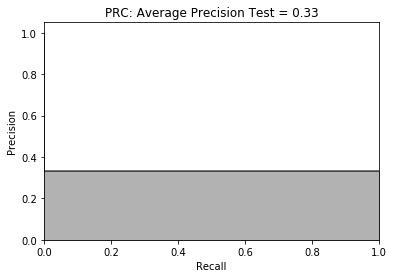

In [29]:
print('Precision:', np.mean(precision))
print('Recall:', np.mean(recall))

confusion_matrix(y_test, logReg.predict(X_test))

average_precision = average_precision_score(y_test,logReg.predict(X_test))


print('Average Precision Test:',average_precision )
precision, recall, thresholds = precision_recall_curve(y_test,logReg.predict(X_test))
plt.step(recall, precision, color='k', alpha=0.7, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.3, color='k')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])

plt.title('PRC: Average Precision Test = {0:0.2f}'.format(
          average_precision))
